In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:
df=pd.read_csv("stud.csv")

In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.corr(numeric_only=True)

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

category in gem=nder
gender
female    518
male      482
Name: count, dtype: int64

['female' 'male']
category in race_ethnicity
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

category in parental_level_of_education
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

category in lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

category in test_preparation_course
test_preparation_course
none         642
completed    358
Name: count, dtype: int64



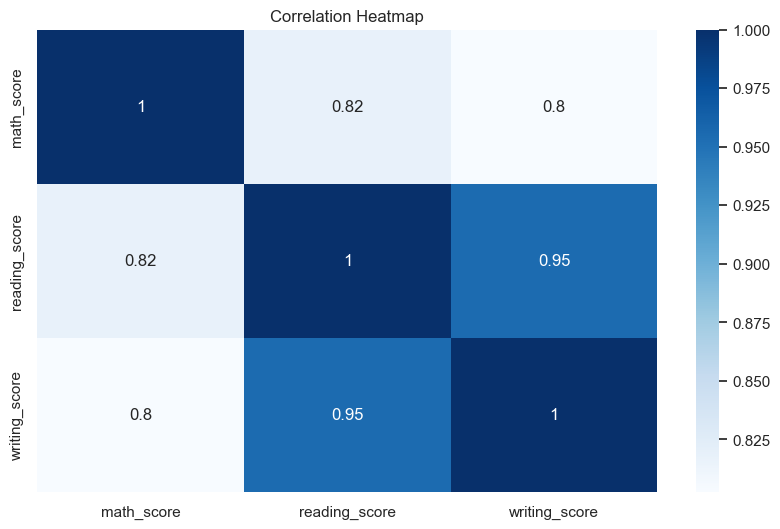

In [24]:
print("category in gem=nder",end="\n")
print(df['gender'].value_counts(),end="\n\n")
print(df['gender'].unique())
print("category in race_ethnicity",end="\n")
print(df['race_ethnicity'].value_counts(),end="\n\n")
print("category in parental_level_of_education",end="\n")
print(df['parental_level_of_education'].value_counts(),end="\n\n")
print("category in lunch",end="\n")
print(df['lunch'].value_counts(),end="\n\n")
print("category in test_preparation_course",end="\n")
print(df['test_preparation_course'].value_counts(),end="\n\n")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

In [26]:
numeric_columns

['math_score', 'reading_score', 'writing_score']

In [27]:
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full=df[df['reading_score'] == 100]['average_score'].count()
writing_full=df[df['writing_score'] == 100]['average_score'].count()
print("Number of students with full marks in reading:",reading_full)
print("Number of students with full marks in writing:",writing_full)
math_full=df[df['math_score'] == 100]['average_score'].count()
print("Number of students with full marks in math:",math_full)

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [32]:
reading_less_20=df[df['reading_score'] < 20]['average_score'].count()
writing_less_20=df[df['writing_score'] < 20]['average_score'].count()
print("Number of students with less than 20 marks in reading:",reading_less_20)
print("Number of students with less than 20 marks in writing:",writing_less_20)
math_less_20=df[df['math_score'] < 20]['average_score'].count()
print("Number of students with less than 20 marks in math:",math_less_20)

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


<Axes: xlabel='average_score', ylabel='Count'>

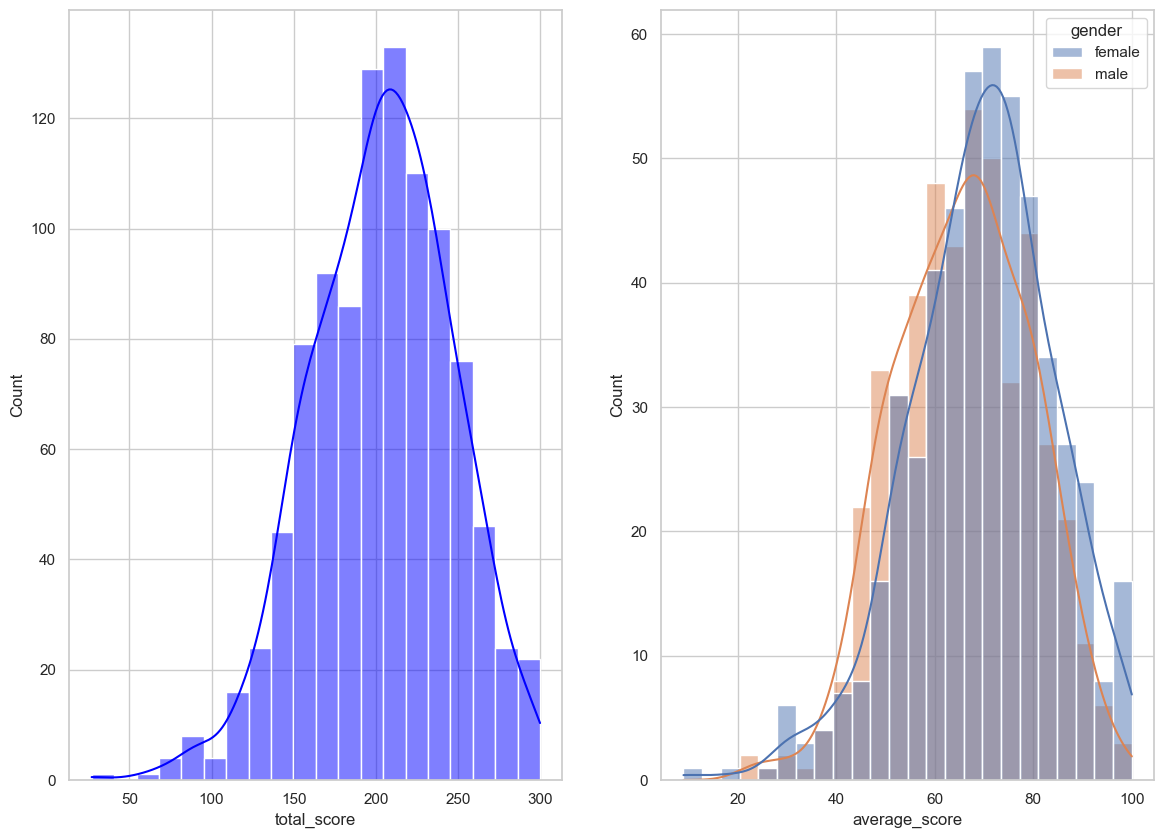

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
plt.subplot(121)
sns.histplot(data=df, x='total_score', kde=True, color='blue', bins=20)
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')

<Axes: xlabel='average_score', ylabel='Count'>

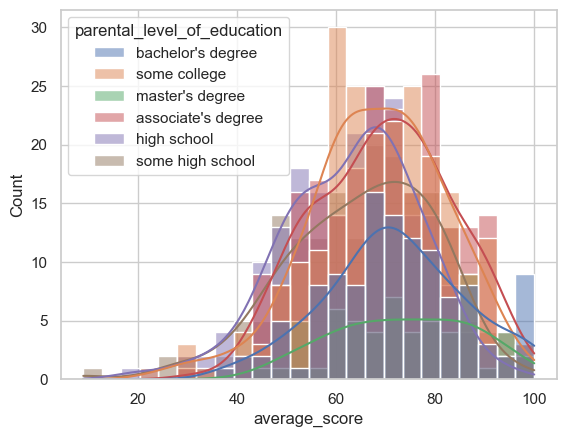

In [39]:
sns.histplot(data=df, x='average_score', kde=True,hue='parental_level_of_education')